#  Car Price Prediction 

# Multiple Linear Regression using Polynomial Features


#### Problem Statement:

The objective of the problem is to predict values “current price” attribute from the given features of the Test data. 


Essentially, the company wants —


- To identify the variables affecting cars current prices,

- To create a linear model that quantitatively relates cars current prices with identified significant variables.

- To know the accuracy of the model, i.e. how well these variables can predict car prices.

**So interpretation is important!**


The prediction is divided in five steps.<br>

1-Data Understanding. <br>
2-Data Cleaning.<br>
3-Data Visualization. <br>
4-Data Preperation.<br>
5-Model Building and evaluation of model <br>
6-Prediction on Test data <br>
7-Inferences

## Step 1 - Data Understanding 

Lets first import the libraries:-

In [143]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [144]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [145]:
#Reading Data

cars_df = pd.read_csv("C:/Users/nidhi/Downloads/UNI.csv")
test= pd.read_csv("C:/Users/nidhi/Downloads/unitest_1.csv")

In [146]:
#let's take few rows for understanding
cars_df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [147]:
test.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,514396,881378,3,115717,3,4,10,144,70,117
1,2,654594,749943,7,135999,1,2,13,161,51,70
2,3,559836,865594,4,142651,1,6,10,184,116,72
3,4,523784,870895,5,57223,4,2,14,170,76,102
4,5,547534,824478,4,51927,5,6,9,162,53,71


In [148]:
#summary about data set 
print(cars_df.info())

print(cars_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
v.id             1000 non-null int64
on road old      1000 non-null int64
on road now      1000 non-null int64
years            1000 non-null int64
km               1000 non-null int64
rating           1000 non-null int64
condition        1000 non-null int64
economy          1000 non-null int64
top speed        1000 non-null int64
hp               1000 non-null int64
torque           1000 non-null int64
current price    1000 non-null float64
dtypes: float64(1), int64(11)
memory usage: 93.8 KB
None
(1000, 12)


In [149]:
cars_df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [150]:
#summary about data set 
print(test.info())

print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
v.id           100 non-null int64
on road old    100 non-null int64
on road now    100 non-null int64
years          100 non-null int64
km             100 non-null int64
rating         100 non-null int64
condition      100 non-null int64
economy        100 non-null int64
top speed      100 non-null int64
hp             100 non-null int64
torque         100 non-null int64
dtypes: int64(11)
memory usage: 8.7 KB
None
(100, 11)


In [151]:
test.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,596882.450000,802484.720000,4.570000,97028.940000,3.030000,4.730000,11.540000,168.450000,85.530000,100.57000
std,29.011492,58932.164975,59869.368032,1.759563,30809.275474,1.507255,2.933109,2.306863,19.309481,20.506444,20.29144
min,1.000000,501916.000000,700856.000000,2.000000,50808.000000,1.000000,1.000000,8.000000,136.000000,50.000000,68.00000
25%,25.750000,547153.500000,751066.750000,3.000000,69065.500000,2.000000,2.000000,10.000000,150.000000,70.000000,84.00000
50%,50.500000,588524.000000,803998.500000,5.000000,95038.000000,3.000000,4.000000,12.000000,170.500000,89.500000,101.00000
75%,75.250000,654812.000000,857478.500000,6.000000,124784.000000,4.000000,7.000000,13.000000,185.000000,102.000000,116.00000
max,100.000000,697944.000000,899831.000000,7.000000,149358.000000,5.000000,10.000000,15.000000,200.000000,119.000000,140.00000


In [152]:
#checking null values
cars_df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [153]:
test.isnull().sum()

v.id           0
on road old    0
on road now    0
years          0
km             0
rating         0
condition      0
economy        0
top speed      0
hp             0
torque         0
dtype: int64

### Hence we checked in dataframe no null values are there 

In [154]:
#checking dublicate values
cars_df[cars_df.duplicated(keep=False)]

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price


In [155]:
test[test.duplicated(keep=False)]

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque


### There are No dublicate Rows

## Step 2  Data Cleaning


### No Data cleaning as such is needed !!! Data looks fine!

## Step 3 Data Visualisation 

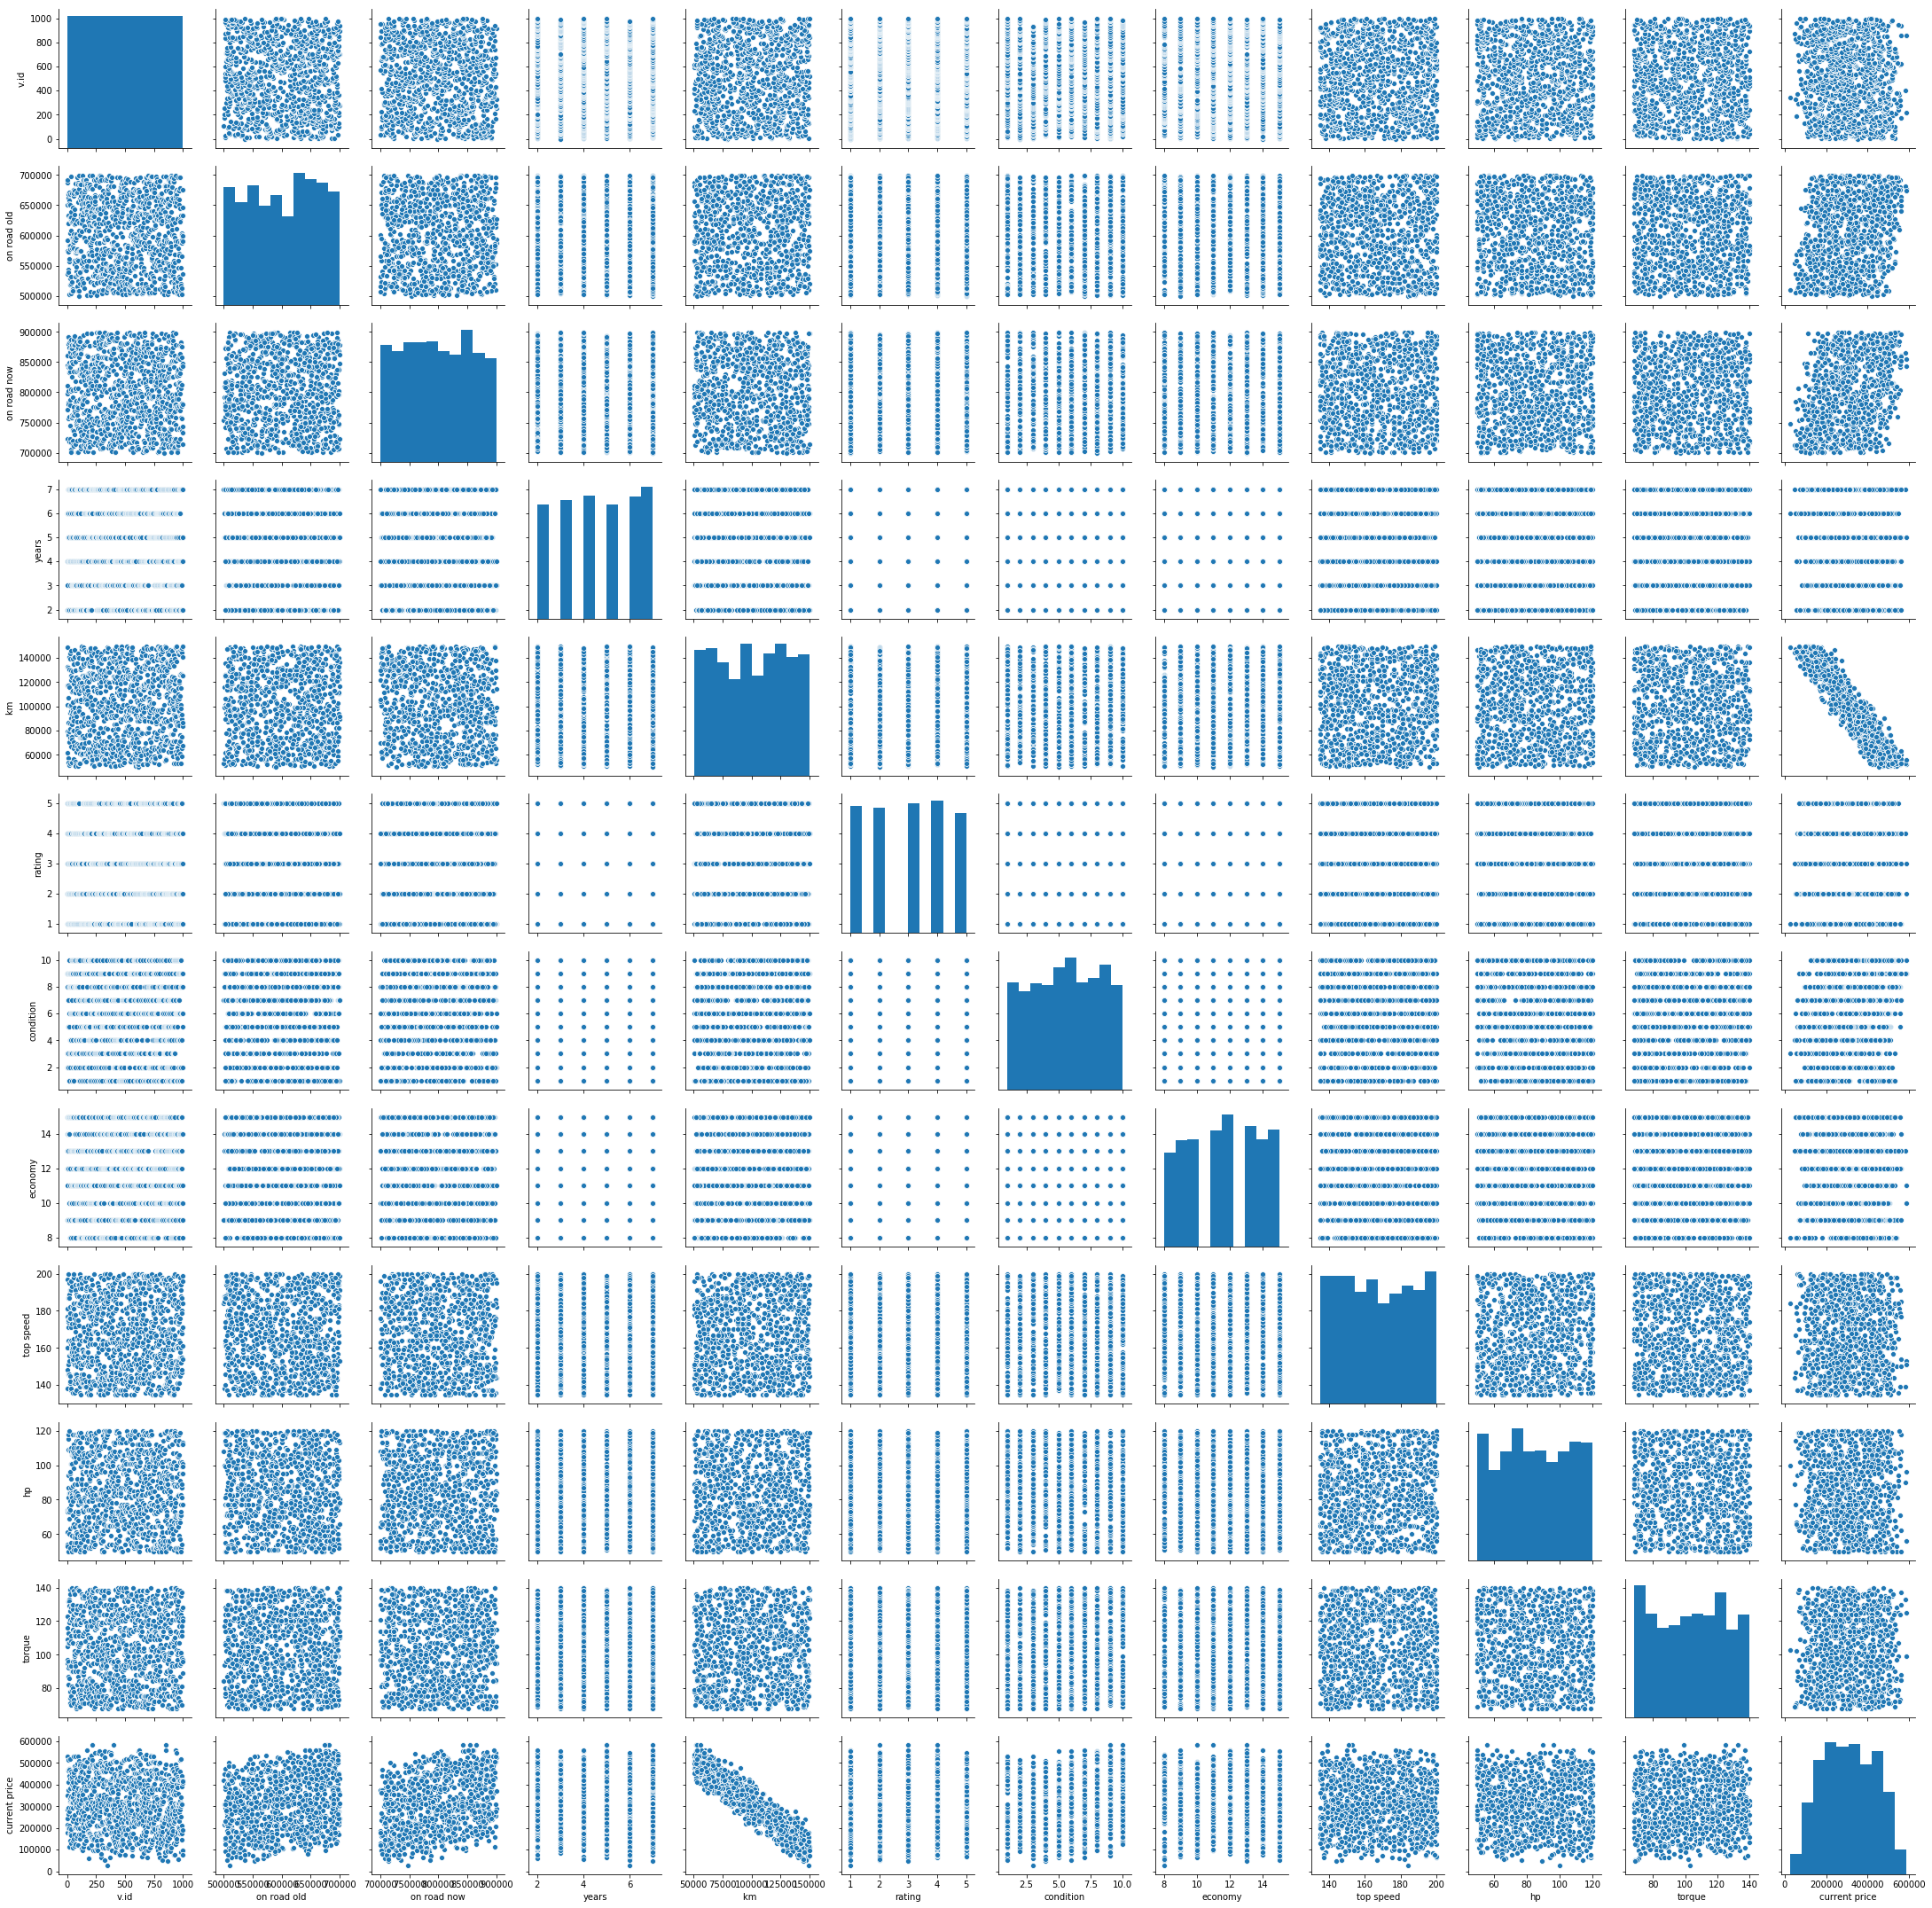

In [156]:
# Plotting all the numerical values

sns.pairplot(cars_df)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [157]:
# Correlation matrix

cor = cars_df.corr()
cor

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


## Dataset is highly Non-linear. No linear correlation!

<Figure size 720x360 with 0 Axes>

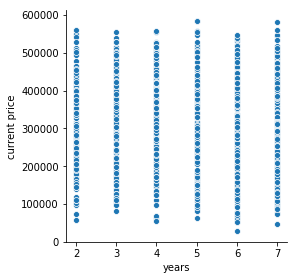

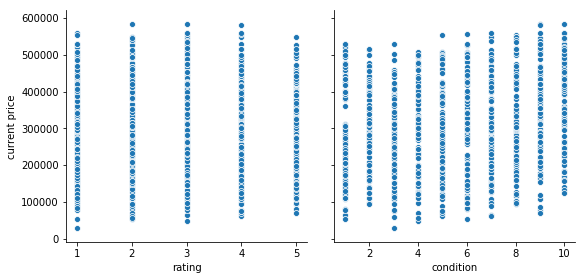

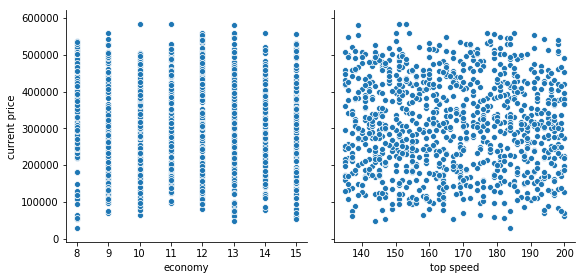

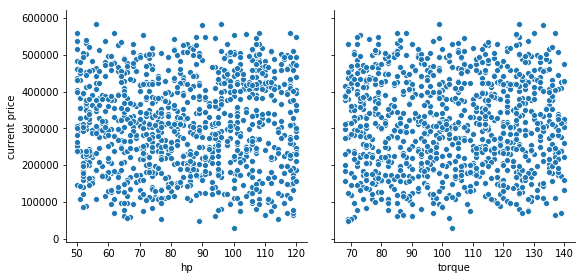

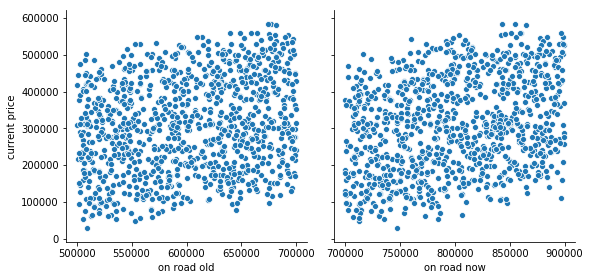

In [158]:
# Making pairplot for all numeric values that we need

plt.figure(figsize=(10,5))

sns.pairplot(cars_df, x_vars=['years'], y_vars='current price',height=4, aspect=1,kind='scatter')

sns.pairplot(cars_df, x_vars=['rating','condition'], y_vars='current price',height=4, aspect=1,kind='scatter')

sns.pairplot(cars_df, x_vars=['economy','top speed'], y_vars='current price',height=4, aspect=1,kind='scatter')

sns.pairplot(cars_df, x_vars=['hp', 'torque'], y_vars='current price',height=4, aspect=1,kind='scatter')

sns.pairplot(cars_df, x_vars=['on road old','on road now'], y_vars='current price',height=4, aspect=1,kind='scatter')



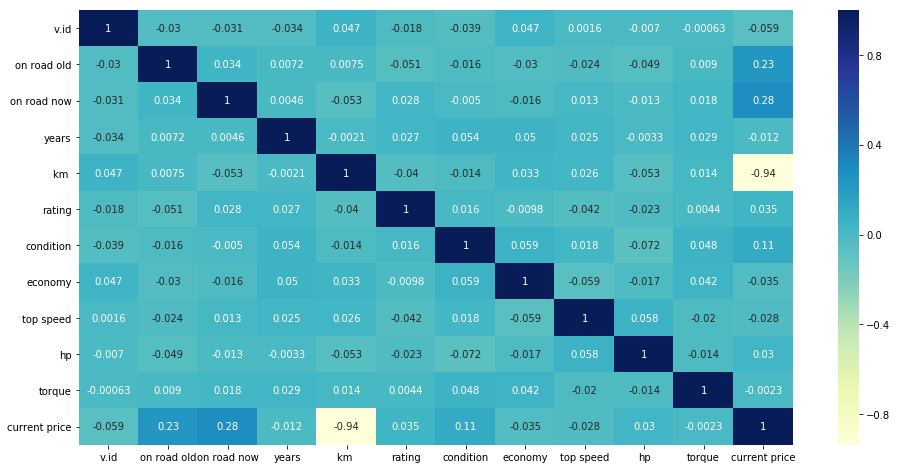

In [159]:
# checking the correlation between numerical variables

plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Its clearing seen that km and current proce are Negatively Correlated. More Kms, lesser price.

## Step 4- Data Preperation

To build a model we have to prepare data

In [160]:
# The v.id can be dropped as we would no longer use that field

df = cars_df.drop(['v.id'],  axis=1)

In [161]:
df.columns

Index(['on road old', 'on road now', 'years', 'km ', 'rating', 'condition',
       'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [162]:
df.shape

(1000, 11)

#### As Features are very less thus all the features are considered in Model Building as All Features looks Significant for analysis as per business knowledge and there is no multicollinearity present in dataset !!!

## Step-5 Model Building 

In [163]:
# Importing necessary libraries

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [164]:
# Segregate features and target into separate variables

X = df.drop(['current price'], axis=1)

y = df['current price']

In [165]:
# Import train_test_split

from sklearn.model_selection import train_test_split

# below step is done to assure  that train and test data set always have the same rows

np.random.seed(0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [166]:
#checking the df_train shape

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


#### As dataset is Non linear, we can take Polynomial of degree 2 as we have to keep trade off between Bias and Variance!!! 

In [167]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)

y_poly_pred = model.predict(x_poly)

In [168]:
model.coef_

array([-1.31833402e-01,  4.54273519e-01,  5.98865512e-01,  6.85589628e+02,
       -4.25778444e+00, -3.06739707e+03, -6.54519348e+03,  5.13971288e+02,
        2.96829441e+00,  2.37332136e+01,  6.67850698e+01,  3.32030368e-08,
       -9.05811248e-09,  2.70946395e-03, -3.78654477e-08,  2.22196116e-03,
       -3.36076076e-05, -1.98665497e-04,  1.84969916e-05, -5.48807525e-05,
        7.31118416e-06, -6.07297466e-08, -4.78917235e-05,  2.12230589e-07,
        2.34140879e-03, -2.55857408e-04,  8.61965782e-05, -1.25746977e-04,
        8.07997793e-07, -6.23856141e-05, -5.04050639e+02,  3.04019690e-03,
        1.52555976e+01, -2.09763002e+01,  4.82747788e+01, -5.89319186e-01,
        2.08717645e+00, -1.50878221e+00, -1.00758371e-08, -2.66303024e-03,
        1.59349315e-03,  9.16473339e-04,  5.29357743e-04,  7.18990977e-05,
       -8.47105710e-05,  1.82770923e+02, -3.51159216e+01, -3.31875792e+01,
        1.42378400e+00,  1.76051682e+00, -4.57326196e+00,  1.11766890e+03,
        7.57007712e-01, -

In [185]:
model.intercept_

-7213.069294831599

In [169]:
y_poly_pred

array([241435.34374814, 241868.63637317, 458866.27267222, 493667.968922  ,
       153980.67187928, 331183.00148849, 305134.54070659, 221359.9461135 ,
       428496.4546639 , 274871.70821901, 174602.56513867, 301656.61550349,
       118171.14796085, 464419.14539796,  54783.50226697, 364297.06655381,
       405097.40485068, 281263.52147589, 197775.04770079, 290301.63371868,
       273568.78151101, 367075.75055852, 231036.85116805, 236423.92367423,
       449182.31325168,  90214.81332489, 188059.13926981, 387596.53460146,
       157332.49394483, 453680.42809482, 237370.84495742, 529871.09131156,
       478293.78726145, 520444.82413639, 276417.79111926, 245889.06767001,
       541498.36598852, 313631.25319347, 489086.75068214, 420391.30226138,
       254998.64980987, 464078.21042274, 235927.55637987, 179156.02047999,
       301964.50975776, 364025.51365862, 179402.86835055, 161632.38462634,
       183495.19864526, 357020.74181065, 261987.88221138, 412485.07869371,
       209732.73541102, 4

#### R2 Score and RMSE on Training data

In [171]:
 # evaluating the model on training dataset

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)

In [172]:
print(rmse)
print(r2)

2779.6747724097295
0.9995112026554777


### Predicting on test data 

In [173]:
  # predicting on test data-set
    
y_test_predict = model.predict(polynomial_features.fit_transform(X_test))

In [174]:

  # evaluating the model on test dataset
    
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

In [175]:
print(rmse_test)
print(r2_test)

2994.7926967426374
0.9994385187414462


## Step 6 :  Prediction on Test file

In [176]:
test_set= test

In [177]:
test1=test.drop(['v.id'], axis=1)

In [178]:
test1.columns

Index(['on road old', 'on road now', 'years', 'km', 'rating', 'condition',
       'economy', 'top speed ', 'hp', 'torque'],
      dtype='object')

In [179]:
ypredict= model.predict(polynomial_features.fit_transform(test1))
ypredict[:10]

array([232854.40950989, 150084.01514887, 147042.53287554, 466294.77424957,
       484318.84079908, 364526.5805312 , 197184.36281315, 429544.55826143,
       121879.42899162, 113160.85505707])

In [180]:
test['v.id']= test_set['v.id']
test['current price']= ypredict

In [181]:
print(test.head())

   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       514396       881378      3  115717       3          4       10   
1     2       654594       749943      7  135999       1          2       13   
2     3       559836       865594      4  142651       1          6       10   
3     4       523784       870895      5   57223       4          2       14   
4     5       547534       824478      4   51927       5          6        9   

   top speed    hp  torque  current price  
0         144   70     117  232854.409510  
1         161   51      70  150084.015149  
2         184  116      72  147042.532876  
3         170   76     102  466294.774250  
4         162   53      71  484318.840799  


In [182]:
test= test.drop(['on road old', 'on road now', 'years', 'km', 'rating', 'condition',
       'economy', 'top speed ', 'hp', 'torque'], axis=1)


In [183]:
test.head()

,v.id,current price
0,1,232854.409510
1,2,150084.015149
2,3,147042.532876
3,4,466294.774250
4,5,484318.840799


In [184]:
test.to_csv('sample_1_1.csv', index=False)